# k-Means
Here we study a class of unsupervised machine learning model: clustering algorithms. Clustering algorithms seek to learn, from the properties of the data, an optimal division or discrete labeling of groups of points.

Many clustering algorithms are available in [Scikit-Learn](https://scikit-learn.org/) and elsewhere, but perhaps the simplest to understand is an algorithm known as k-means clustering, which is implemented in `sklearn.cluster.KMeans`.

The k-Means algorithm searches for a **pre-determined number of clusters** within an **unlabeled multidimensional** dataset. It accomplishes this using a simple conception of what the optimal clustering looks like:

- The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
- Each point is closer to its own cluster center than to other cluster centers.

Those two assumptions are the basis of the k-means model.

Let's import some libraries.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

First, let's generate a two-dimensional dataset containing four distinct blobs. To emphasize that this is an unsupervised algorithm, we will leave the labels out of the visualization.

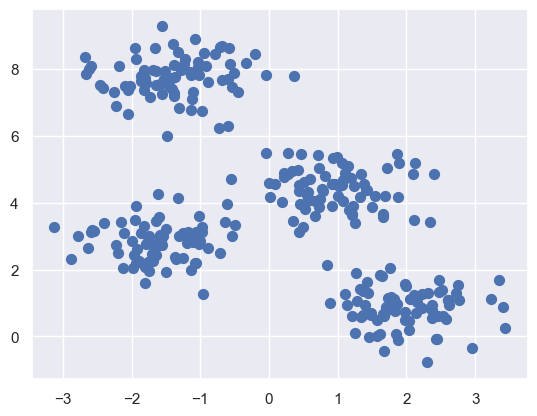

In [2]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

By eye, it is relatively easy to pick out the four clusters.

The k-means algorithm does this automatically:

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, n_init='auto')
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

Let's visualize the results by plotting the data colored by these labels. We  also plot the cluster centers as determined by the k-means estimator:

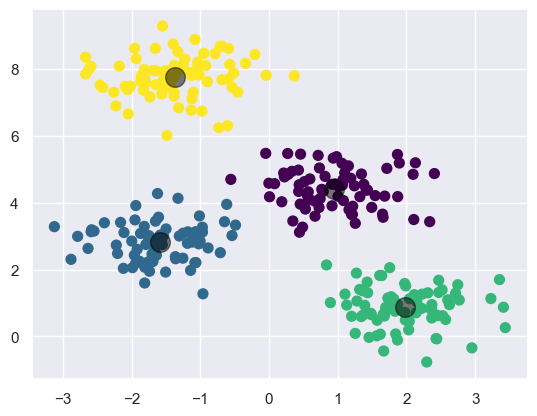

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_ # Obtain cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


The k-Means algorithm (at least in this simple case) assigns the points to clusters very similarly to how we might assign them by eye.

But you might wonder how this algorithm finds these clusters so quickly! After all, the number of possible combinations of cluster assignments is exponential in the number of data points—an exhaustive search would be very, very costly.

Fortunately for us, such an exhaustive search is not necessary: instead, the typical approach to k-means involves an intuitive iterative approach known as expectation–maximization.

Expectation–maximization (E–M) is a powerful algorithm that comes up in a variety of contexts within data science. k-means is a particularly simple and easy-to-understand application of the algorithm, and we will walk through it briefly here.

In short, the expectation–maximization approach here consists of the following procedure:

1. Guess some cluster centers
2. Repeat until converged:
   1. E-Step: assign points to the nearest cluster center
   2. M-Step: set the cluster centers to the mean


0
[[ 0.996244    5.28262763]
 [-1.39262004  7.7943098 ]
 [ 1.26533912  3.65658566]
 [-0.03528305  1.93369899]]
1
[[ 0.83263592  4.88355267]
 [-1.37324398  7.75368871]
 [ 1.2765107   3.49693401]
 [ 0.07073369  1.83930067]]
2
[[ 0.73354867  4.69619738]
 [-1.37324398  7.75368871]
 [ 1.57053447  3.18291777]
 [ 0.08076459  1.82281716]]
3
[[ 0.68610507  4.58014816]
 [-1.37324398  7.75368871]
 [ 1.99353493  2.29271701]
 [-0.15097595  1.85826735]]
4
[[ 0.78282981  4.46904474]
 [-1.37324398  7.75368871]
 [ 2.0369849   1.00237166]
 [-1.3970296   2.64850389]]
5
[[ 0.92914792  4.41289231]
 [-1.37324398  7.75368871]
 [ 1.98258281  0.86771314]
 [-1.59748572  2.8156934 ]]
6
[[ 0.94973532  4.41906906]
 [-1.37324398  7.75368871]
 [ 1.98258281  0.86771314]
 [-1.58438467  2.83081263]]


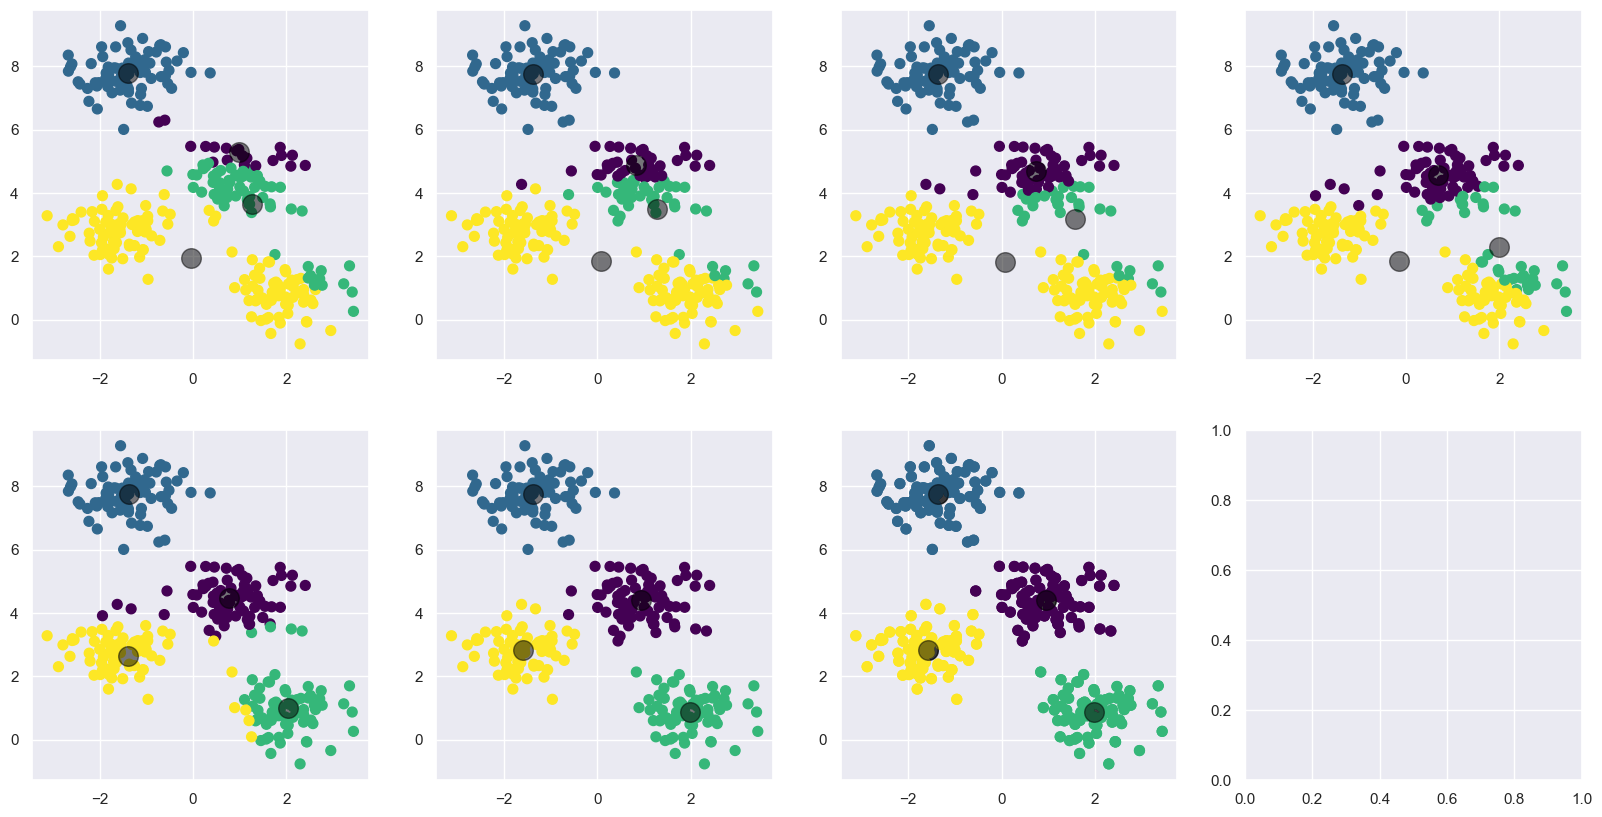

In [5]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    # For plotting all iterations together
    fig, axes = plt.subplots(2, 4)
    fig.set_figheight(10)
    fig.set_figwidth(20)

    i=int(0)
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)

        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers

        plt.subplot(2,4,i+1)
        plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');
        plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
        #plt.show()

        print(i)
        i += 1

        print(centers)

    return centers, labels

centers, labels = find_clusters(X, 4)

# And the final solution
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


**As an exercice, you can try to plot the sum squared of the distances between each point and its cluster centroid, and see how it evolves with each iteration.**

Note that when the seed is chosen poorly (here `rseed=0`), this can lead to poor classification. This is because there is no assurance in general that the procedure will lead to the best *global* solution.

0
[[-1.02053394  5.33759029]
 [ 1.85843325  1.34057553]
 [ 0.81594697  3.67185725]
 [ 2.02488729  0.42951967]]
1
[[-1.45749135  6.32442404]
 [ 1.85419761  1.32808994]
 [ 0.13572612  3.68769178]
 [ 2.03350329  0.4180301 ]]
2
[[-1.35579987  7.72369613]
 [ 1.94101864  1.38485552]
 [-0.33709008  3.61375477]
 [ 2.03350329  0.4180301 ]]
3
[[-1.37324398  7.75368871]
 [ 1.96248697  1.44113424]
 [-0.35164179  3.62712721]
 [ 2.01581585  0.41580395]]
4
[[-1.37324398  7.75368871]
 [ 1.967238    1.45516011]
 [-0.35164179  3.62712721]
 [ 2.00981924  0.42842824]]
5
[[-1.37324398  7.75368871]
 [ 1.95636329  1.46879371]
 [-0.35164179  3.62712721]
 [ 2.01881381  0.44148546]]


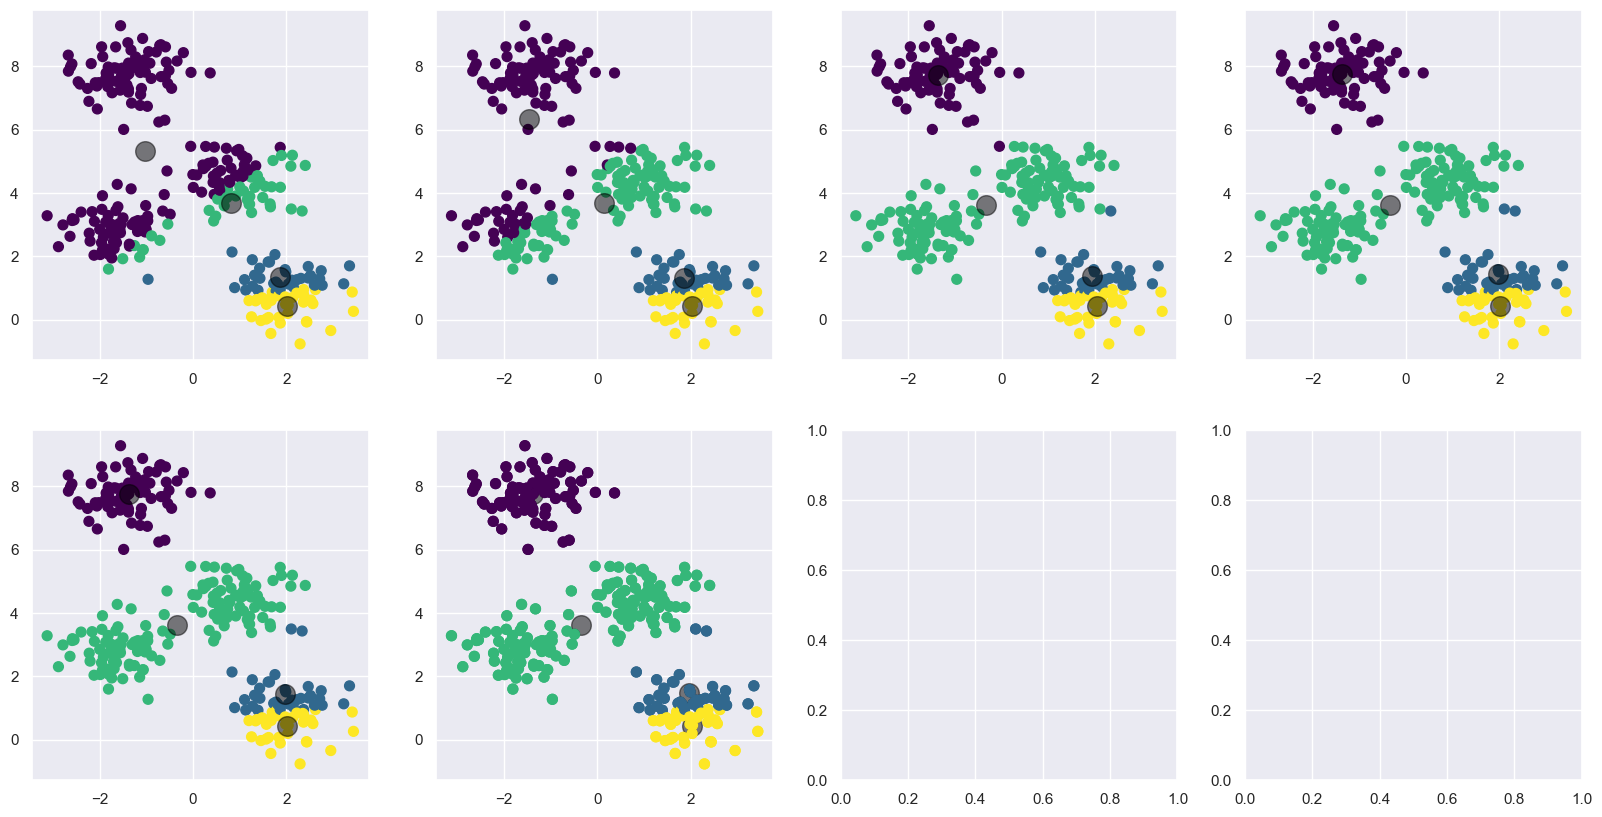

In [6]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');


A common problem with k-Means is that it needs to know the number of clusters *beforehand* and it will try to use all the categories!

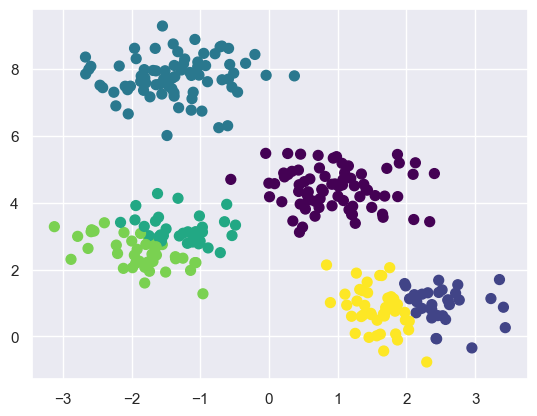

In [7]:
labels = KMeans(6, random_state=0, n_init='auto').fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

## Non-Linear Boundaries

k-Means limited to linear cluster boundaries. It can't therefore separate more complex disributions.*italicized text*

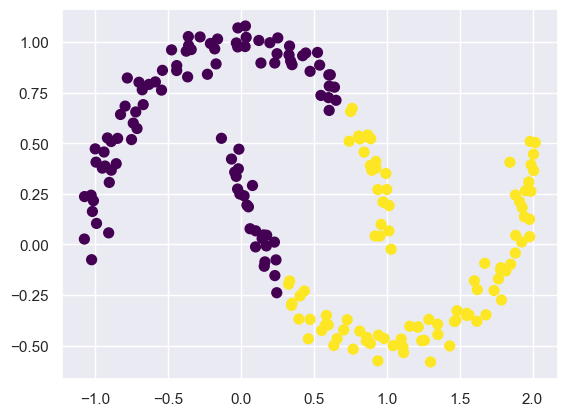

In [8]:
from sklearn.datasets import make_moons
X1, y1 = make_moons(200, noise=.05, random_state=0)

labels = KMeans(2, random_state=0, n_init='auto').fit_predict(X1)
plt.scatter(X1[:, 0], X1[:, 1], c=labels,
            s=50, cmap='viridis');

To overcome the above limitation, one can use a *kernelised* k-Means, e.g. the SpectralClustering estimator.


/Users/karolos/miniconda3/envs/MCXA0034/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


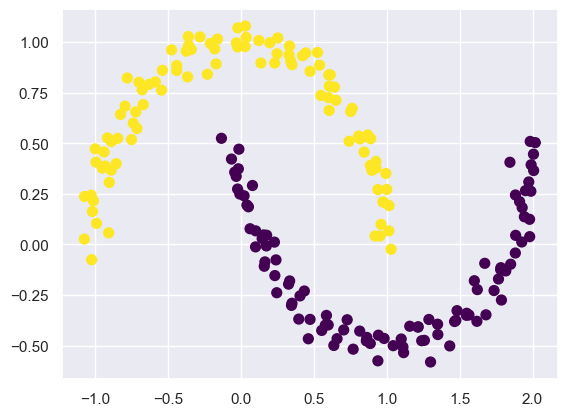

In [9]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X1)
plt.scatter(X1[:, 0], X1[:, 1], c=labels,
            s=50, cmap='viridis');


# Some more fun with k-Means


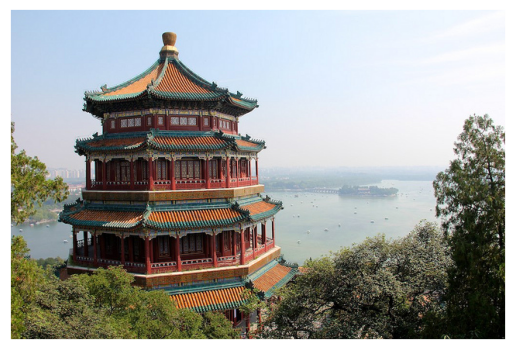

In [10]:
!pip install pillow

from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

Let us look at the shape of the multi-dimensional array in which the image above is imported. That's 640x427x3 colors.

In [11]:
china.shape

(427, 640, 3)

Let's reshape the data and rescale it to be between 0 and 1, rather than from 0 to 255 (in color levels).

In [12]:
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

We can consider all pixels as 273k points that have a x (red), y (green), z (blue) coordinate (i.e. points in space).

Now let's reduce these 16 million colors (256^3) to just 16 colors, using a k-means clustering across the pixel space. Because we are dealing with a very large dataset, we will use the **mini batch k-Means**, which **operates on subsets of the data to compute the result much more quickly** than the standard k-means algorithm:



In [13]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]


The result is a re-coloring of the original pixels, where each pixel is assigned the color of its closest cluster center.

Plotting these new colors in the image space rather than the pixel space shows us the effect of this:

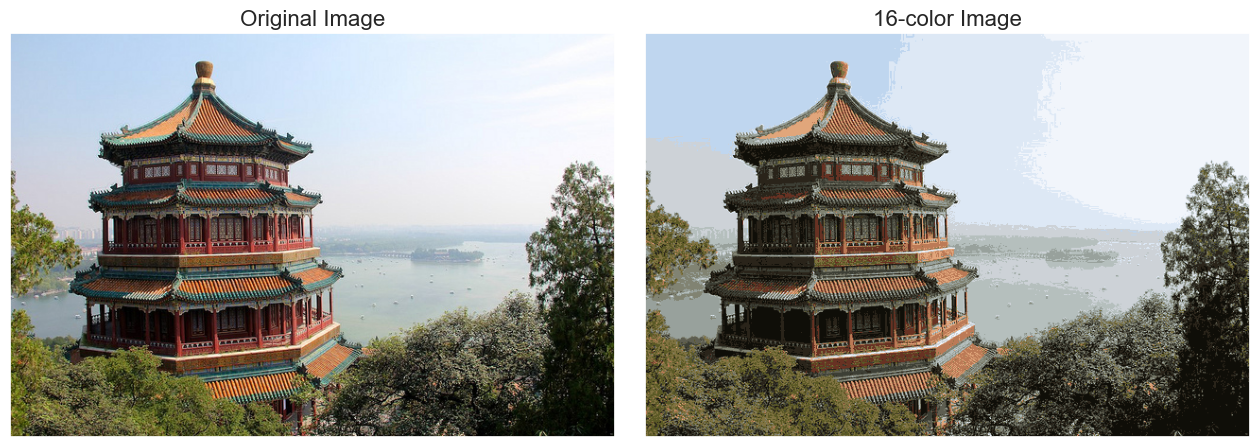

In [14]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

Some detail is certainly lost in the rightmost panel, but the overall image is still easily recognizable. This image on the right achieves a compression factor of around 1 million!

While this is an interesting application of k-means, there are certainly better way to compress information in images. But the example shows the power of thinking outside of the box with unsupervised methods like k-means.

